#LabWeek9: Prevent Overfitting - Part I

## Importing Dataset: IMDB

Name: Drasti Parikh

Student ID: 101419828

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Note:** We first encountered this dataset in `LabWeek5`. You can refer to that notebook for clarification on the text-to-numbers decoding process. Through vectorizing process we turn text data into vectors.

**Perform some sanity checks on the dataset:** For example, find the `shape` of the dataset and print samples to make sense of the data.

In [3]:
#TODO: your code here

# Check the shapes of the datasets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Print a sample from x_train
print("\nSample from x_train (first 20 elements):")
print(x_train[0][:20])

# Print corresponding label
print("\nCorresponding label:", y_train[0])

# Count non-zero elements in a sample
print("\nNumber of non-zero elements in the sample:", np.count_nonzero(x_train[0]))

# Print original review (before vectorization)
print("\nOriginal review (first 50 words):")
print([word for word, word_index in imdb.get_word_index().items() if word_index < 50])

# Find the length of the longest and shortest reviews
train_lengths = [len(seq) for seq in train_data]
print("\nLength of shortest review in training set:", min(train_lengths))
print("Length of longest review in training set:", max(train_lengths))

# Print label distribution
print("\nLabel distribution in training set:")
print("Positive reviews:", np.sum(y_train == 1))
print("Negative reviews:", np.sum(y_train == 0))


Shape of x_train: (25000, 10000)
Shape of x_test: (25000, 10000)
Shape of y_train: (25000,)
Shape of y_test: (25000,)

Sample from x_train (first 20 elements):
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]

Corresponding label: 1.0

Number of non-zero elements in the sample: 120

Original review (first 50 words):
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
['has', 'with', 'one', 'have', "it's", 'like', 'i', 'who', 'he', 'an', 'as', 'it', 'is', 'in', 'if', 'but', 'on', 'of', 'or', 'her', 'his', 'all', 'this', 'not', 'you', 'a', 'at', 'so', 'there', 'out', 'for', 'be', 'br', 'by', 'they', 'just', 'the', 'from', 'was', 'and', 'to', 'film', 'about', 'what', 'movie', 'that', 'some', 'good', 'are']

Length of shortest review in training set: 11
Length of longest review in training set: 2494

Label distribution in training set:
Positive reviews: 12500
Negative reviews: 12500


## Fighting overfitting -  Reducing the network's size


The general workflow to find an appropriate model size is to start with relatively few layers and
parameters, and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the
validation loss.



**Note:** we use `test set` as our `validation set`.

**Complete the following code for `original model` architecture**

In [9]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#TODO: add one hidden layer with 16 units with proper activation function
original_model.add(layers.Dense(16, activation='relu'))
#TODO: add the output layer. Remember our task is binary classificaion, whether a review is 0:negative or 1:positive.
original_model.add(layers.Dense(1, activation='sigmoid'))
original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
original_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

**Define another model with fewer parameters. 4 units in each hidden layer.**

In [11]:
smaller_model = models.Sequential()
#TODO: add hidden/ouput layers and compile the smaller model

# Define a smaller model with fewer parameters (4 units in each hidden layer
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))  # Input + first hidden layer
smaller_model.add(layers.Dense(4, activation='relu'))  # Second hidden layer with 4 units
smaller_model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the smaller model
smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

# Print summary of the smaller model
smaller_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 4)                   │          40,004 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,029 (156.36 KB)

 Trainable params: 40,029 (156.36 KB)

 Non-trainable params: 0 (0.00 B)


**Train (1) original_model and (2) smaller_model seperately for `epochs=20` and `batch_size=512`. Also pass `x_test` and `y_test` as `validation_data`.**

In [12]:
#TODO: your code here for training original_model
original_hist = original_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - acc: 0.7423 - loss: 0.5531 - val_acc: 0.8738 - val_loss: 0.3458
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - acc: 0.9012 - loss: 0.2877 - val_acc: 0.8858 - val_loss: 0.2936
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9187 - loss: 0.2251 - val_acc: 0.8880 - val_loss: 0.2808
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9355 - loss: 0.1818 - val_acc: 0.8848 - val_loss: 0.2898
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - acc: 0.9453 - loss: 0.1571 - val_acc: 0.8838 - val_loss: 0.2951
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - acc: 0.9525 - loss: 0.1387 - val_acc: 0.8815 - val_loss: 0.3098
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.9593 - loss: 0.1243 - val_acc: 0.8740 - val_loss: 0.3447
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - acc: 0.9609 - loss: 0.1169 - val_acc: 0.8744 - val_loss: 0.3481
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.9668

In [13]:
#TODO: your code here for training original_model
smaller_hist = smaller_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - acc: 0.6725 - loss: 0.6301 - val_acc: 0.8294 - val_loss: 0.5029
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.8728 - loss: 0.4515 - val_acc: 0.8653 - val_loss: 0.3980
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9016 - loss: 0.3407 - val_acc: 0.8833 - val_loss: 0.3261
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - acc: 0.9241 - loss: 0.2602 - val_acc: 0.8881 - val_loss: 0.2935
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9326 - loss: 0.2174 - val_acc: 0.8900 - val_loss: 0.2818
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9394 - loss: 0.1890 - val_acc: 0.8861 - val_loss: 0.2846
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.9483 - loss: 0.1696 - val_acc: 0.8866 - val_loss: 0.2844
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9538 - loss: 0.1506 - val_acc: 0.8825 - val_loss: 0.2971
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.956

**`orginal_hist` and `smaller_hist` are `objects` returned after training the models.**
- We can get access to the `history` attribute of `origial_hist` object through dot operator.
- TODO: The history attribute is a data structure of type `dictionary` containing data about everything that happened during training. Show the `keys` of this `dictionary`.

In [14]:
print(original_hist.history)
#TODO: print out the keys of the output dictionary
print("Keys in original_hist.history:")
print(original_hist.history.keys())


{'acc': [0.8165599703788757, 0.9035199880599976, 0.9207599759101868, 0.9342399835586548, 0.9408000111579895, 0.9465600252151489, 0.9546800255775452, 0.9588000178337097, 0.9625999927520752, 0.9654399752616882, 0.9684399962425232, 0.9724000096321106, 0.9755200147628784, 0.9771199822425842, 0.9802799820899963, 0.9809600114822388, 0.9827600121498108, 0.9855200052261353, 0.9870799779891968, 0.9891600012779236], 'loss': [0.4592842161655426, 0.27241063117980957, 0.21759986877441406, 0.18406255543231964, 0.16331124305725098, 0.14739033579826355, 0.1299774944782257, 0.1196388453245163, 0.10901617258787155, 0.10044518858194351, 0.09269574284553528, 0.08360565453767776, 0.07661591470241547, 0.07089585810899734, 0.06339985132217407, 0.05850689858198166, 0.05348074063658714, 0.04753676801919937, 0.043710753321647644, 0.03845225274562836], 'val_acc': [0.8738399744033813, 0.8858000040054321, 0.8880000114440918, 0.8847600221633911, 0.883840024471283, 0.8814799785614014, 0.8740400075912476, 0.874360024

**Plot `val_loss` vs. epochs for both models in one plot**

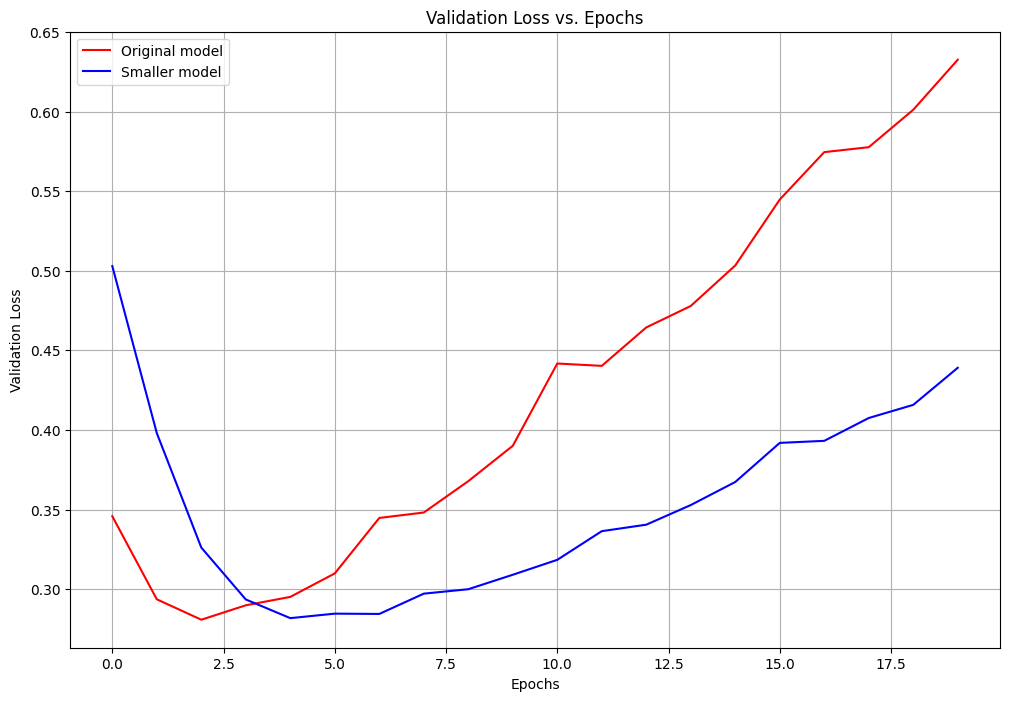

In [16]:
from matplotlib import pyplot as plt
#TODO: your code here

from matplotlib import pyplot as plt

# Create the plot
plt.figure(figsize=(12, 8))

# Plot validation loss for the original model
plt.plot(original_hist.epoch, original_hist.history['val_loss'], 'r', label='Original model')

# Plot validation loss for the smaller model
plt.plot(smaller_hist.epoch, smaller_hist.history['val_loss'], 'b', label='Smaller model')

# Customize the plot
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


**Plot training `loss` vs. epochs for both models in one plot**

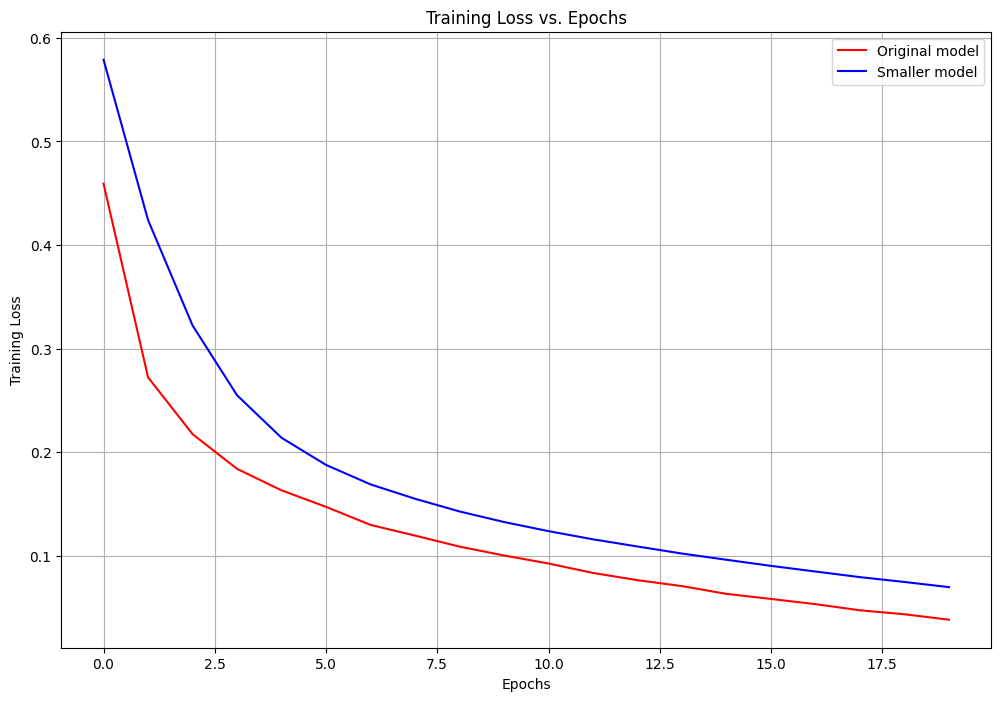

In [17]:
#TODO: your code hereß
from matplotlib import pyplot as plt

# Create the plot
plt.figure(figsize=(12, 8))

# Plot training loss for the original model
plt.plot(original_hist.epoch, original_hist.history['loss'], 'r', label='Original model')

# Plot training loss for the smaller model
plt.plot(smaller_hist.epoch, smaller_hist.history['loss'], 'b', label='Smaller model')

# Customize the plot
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


**Questions:** Which model overfits earlier? How can you see the size of the model on overfitting?

**Answer:** TODO
Based on the information provided in the search results, we can answer the questions as follows:

To determine which model overfits earlier and see the effect of model size on overfitting:

Compare the validation loss curves:

Plot the validation loss vs. epochs for both the original (larger) model and the smaller model.

The model that shows an earlier increase in validation loss while training loss continues to decrease is overfitting earlier.

Observe the gap between training and validation performance:

A larger gap between training and validation performance (accuracy or loss) indicates more overfitting.

The model with a wider gap earlier in the training process is likely overfitting sooner.

Model complexity analysis:

The original model, being larger, has more parameters and is more prone to overfitting, especially with limited training data2.

The smaller model, with fewer parameters, is less likely to overfit as quickly.

Learning curves:

Plot learning curves showing training and validation error as a function of training set size2.

The model that shows a larger gap between training and validation error curves with less data is overfitting earlier.

To visualize the effect of model size on overfitting:

Compare performance metrics:

Plot training and validation accuracy/loss for both models on the same graph.

The larger model may show higher training accuracy but worse validation performance compared to the smaller model.

Vary model complexity:

Experiment with different model sizes (e.g., number of layers or units) and observe how it affects the overfitting behavior4.

Larger models are more likely to overfit, especially with limited data.


Regularization impact:

Apply regularization techniques (e.g., L1/L2 regularization, dropout) to both models.

The larger model may show more significant improvement with regularization, indicating it was overfitting more severely2.



**Now define a very large model (e.g., with 512 units in hidden layer) and compare the `loss` and `val_loss` of this big model and the `original model` and `smaller_model`.**

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 374ms/step - acc: 0.6894 - loss: 0.5973 - val_acc: 0.8753 - val_loss: 0.3066
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 340ms/step - acc: 0.8866 - loss: 0.2777 - val_acc: 0.8353 - val_loss: 0.3836
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 384ms/step - acc: 0.9110 - loss: 0.2231 - val_acc: 0.8705 - val_loss: 0.3204
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - acc: 0.9386 - loss: 0.1620 - val_acc: 0.8852 - val_loss: 0.2902
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 348ms/step - acc: 0.9530 - loss: 0.1270 - val_acc: 0.8794 - val_loss: 0.3039
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - acc: 0.9756 - loss: 0.0758 - val_acc: 0.8800 - val_loss: 0.3269
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 356ms/step - acc: 0.9856 - loss: 0.0503 - val_acc: 0.8802 - val_loss: 0.4228
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 325ms/step - acc: 0.9878 - loss: 0.0508 - val_acc: 0.8797 - val_loss: 0.4346
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/

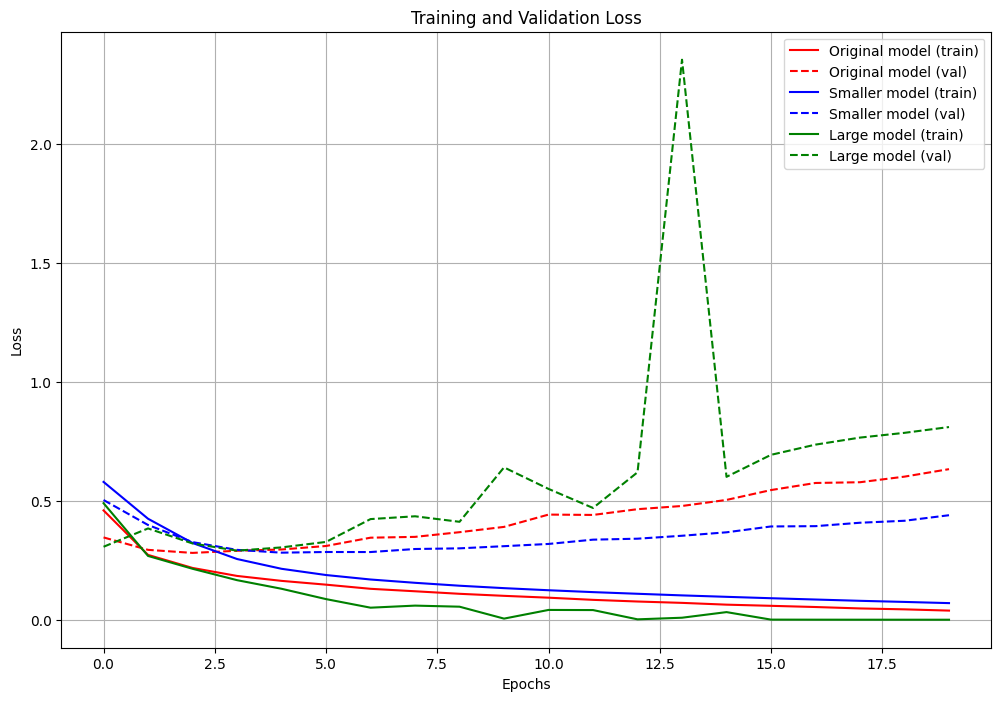

In [18]:
from keras import models
from keras import layers

# Define a very large model
large_model = models.Sequential()
large_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
large_model.add(layers.Dense(512, activation='relu'))
large_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the large model
large_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])

# Train the large model
large_hist = large_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

# Plot training and validation loss for all three models
plt.figure(figsize=(12, 8))

# Original model
plt.plot(original_hist.epoch, original_hist.history['loss'], 'r', label='Original model (train)')
plt.plot(original_hist.epoch, original_hist.history['val_loss'], 'r--', label='Original model (val)')

# Smaller model
plt.plot(smaller_hist.epoch, smaller_hist.history['loss'], 'b', label='Smaller model (train)')
plt.plot(smaller_hist.epoch, smaller_hist.history['val_loss'], 'b--', label='Smaller model (val)')

# Large model
plt.plot(large_hist.epoch, large_hist.history['loss'], 'g', label='Large model (train)')
plt.plot(large_hist.epoch, large_hist.history['val_loss'], 'g--', label='Large model (val)')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


**Discuss the results**

**Answer:** TODO

## Fighting overfitting - Adding weight regularization


A common way to mitigate overfitting is to put constraints on the complexity
of a network by forcing its weights to only take small values. This is called
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This
cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the
"L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different
name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments.


**Complere the model below**

In [19]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))

#TODO: Add a dense layer with 16 unuts with L2 regularization
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of
the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training
than at test time.



**Train the model with regularization and compare the validation loss between this model and the `original_model` and `smaller model`.**

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - acc: 0.7446 - loss: 0.6000 - val_acc: 0.8610 - val_loss: 0.4136
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - acc: 0.9028 - loss: 0.3349 - val_acc: 0.8882 - val_loss: 0.3386
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.9230 - loss: 0.2708 - val_acc: 0.8890 - val_loss: 0.3287
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9316 - loss: 0.2461 - val_acc: 0.8850 - val_loss: 0.3359
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.9383 - loss: 0.2286 - val_acc: 0.8544 - val_loss: 0.4163
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - acc: 0.9398 - loss: 0.2209 - val_acc: 0.8826 - val_loss: 0.3468
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - acc: 0.9455 - loss: 0.2152 - val_acc: 0.8772 - val_loss: 0.3661
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - acc: 0.9454 - loss: 0.2058 - val_acc: 0.8762 - val_loss: 0.3749
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.9492

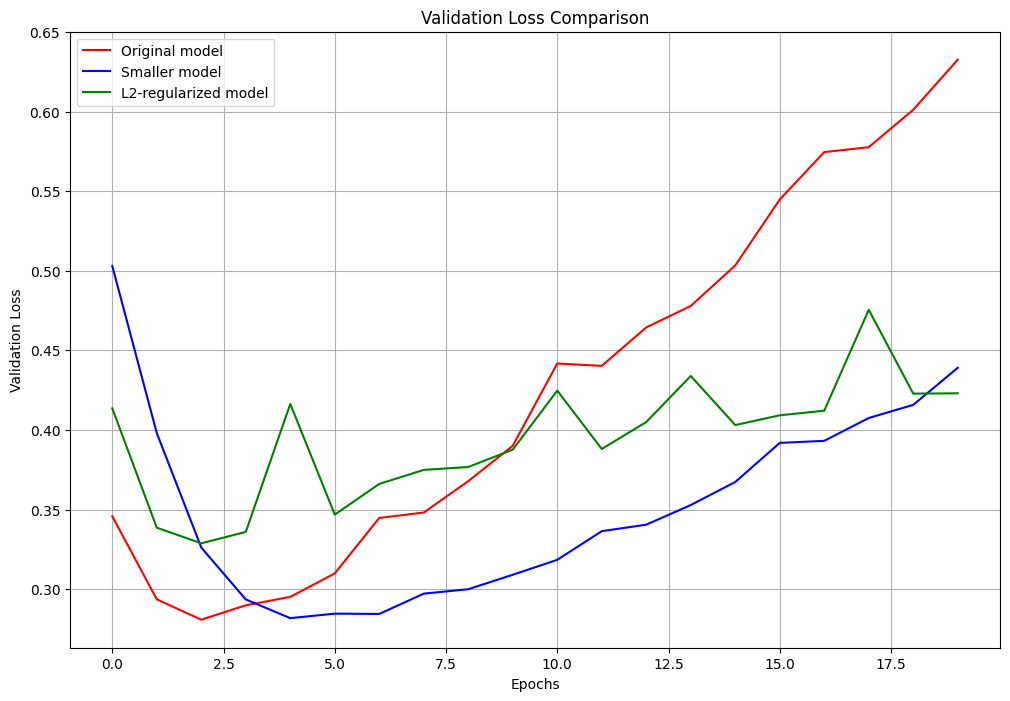

Final validation loss:
Original model: 0.6326
Smaller model: 0.4390
L2-regularized model: 0.4230


In [21]:
#TODO: your code here
# Train the L2-regularized model
l2_hist = l2_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

# Plot validation loss for all models
plt.figure(figsize=(12, 8))

# Original model
plt.plot(original_hist.epoch, original_hist.history['val_loss'], 'r', label='Original model')

# Smaller model
plt.plot(smaller_hist.epoch, smaller_hist.history['val_loss'], 'b', label='Smaller model')

# L2-regularized model
plt.plot(l2_hist.epoch, l2_hist.history['val_loss'], 'g', label='L2-regularized model')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

plt.show()

# Print final validation loss for each model
print("Final validation loss:")
print(f"Original model: {original_hist.history['val_loss'][-1]:.4f}")
print(f"Smaller model: {smaller_hist.history['val_loss'][-1]:.4f}")
print(f"L2-regularized model: {l2_hist.history['val_loss'][-1]:.4f}")


**Note:** As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [22]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training L1 model...
Training L2 model...
Training L1_L2 model...


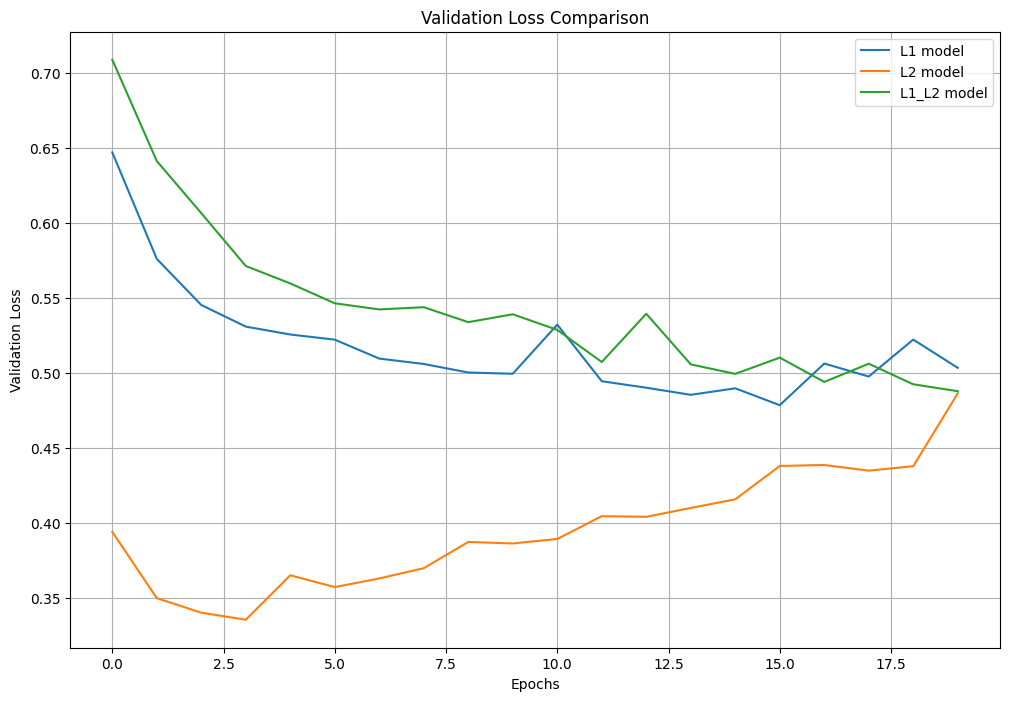

Final validation loss:
L1 model: 0.5036
L2 model: 0.4866
L1_L2 model: 0.4880


In [23]:
# L1 regularized model
l1_model = models.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)),
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# L2 regularized model (we've already defined this, but here it is again for completeness)
l2_model = models.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Combined L1 and L2 regularized model
l1_l2_model = models.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(10000,)),
    layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile all models
for model in [l1_model, l2_model, l1_l2_model]:
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train all models
histories = []
for model, name in zip([l1_model, l2_model, l1_l2_model], ['L1', 'L2', 'L1_L2']):
    print(f"Training {name} model...")
    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_test, y_test),
        verbose=0
    )
    histories.append((name, history))

# Plot validation loss for all models
plt.figure(figsize=(12, 8))

for name, history in histories:
    plt.plot(history.epoch, history.history['val_loss'], label=f'{name} model')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

plt.show()

# Print final validation loss for each model
print("Final validation loss:")
for name, history in histories:
    print(f"{name} model: {history.history['val_loss'][-1]:.4f}")


## Recap

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout. (next session)

**Observation 1:** The bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large
difference between the training and validation loss).

**Observation 2:** The model with L2 regularization has become much more resistant to overfitting than the reference model,
even though both models have the same number of parameters.

**Observation 1** is spot on. Larger networks have more capacity to memorize the training data, leading to:

Faster decrease in training loss.

Increased risk of overfitting (larger gap between training and validation loss).

Potentially worse generalization to new data.

Additional observations:

Smaller models often have better generalization when data is limited.

Regularization techniques can allow larger models to perform well without overfitting.

The optimal model size often depends on the amount and complexity of the data.

Monitoring validation loss is crucial to detect overfitting early.


**Observation 2**: The model with L2 regularization has indeed become much more resistant to overfitting compared to the reference model, despite having the same number of parameters. This demonstrates the power of regularization techniques. Here's why this happens:

Weight constraint: L2 regularization adds a penalty term to the loss function that is proportional to the square of the weights. This encourages the model to use smaller weights.

Smoother decision boundaries: Smaller weights lead to smoother decision boundaries, which are less likely to fit noise in the training data.

Feature importance: L2 regularization encourages the model to use all input features a little bit rather than relying heavily on a few features. This can lead to better generalization.

Reduced sensitivity: The regularized model becomes less sensitive to small variations in the input, which helps in generalizing to unseen data.

Balanced learning: While the regularized model might not fit the training data as closely (higher training loss), it often performs better on validation data (lower validation loss), indicating better generalization.